In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import nltk

In [2]:
train = pd.read_csv("train.txt", header = None, sep = ";")
test = pd.read_csv("test.txt", header = None, sep = ";")
val = pd.read_csv("val.txt", header = None, sep = ";")

In [3]:
train.head()

,0,1
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
test.head()

,0,1
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [5]:
val.head()

,0,1
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [6]:
train.rename(columns = {0 : "text", 1 : "emotion"}, inplace = True)

In [7]:
test.columns = ["text", "emotion"]
test.head()

,text,emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [8]:
#nltk.download("punkt")  # ingilizce için gercerli olan kurulumlar

In [9]:
#train.info()

In [10]:
train.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [11]:
train.text[3]

'i am ever feeling nostalgic about the fireplace i will know that it is still on the property'

In [12]:
train.text[0]

'i didnt feel humiliated'

In [13]:
## train.text = train.text.str.lower()
# kucuk harrf

In [14]:
## train.text = train.text.str.replace('[^\w\s]', '')
# noktalama işaretlerini boslukla değiştirir.

In [15]:
## train.text = train.text.str.replace('\n', '')
# \n yerine bosluk koy.

In [16]:
train.text = train.text.str.replace('\r', '')
# satırbaslarını kaldırır.

In [17]:
import seaborn as sbn

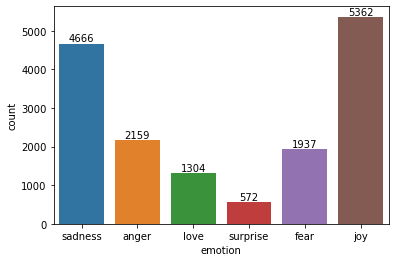

In [18]:
ax = sbn.countplot(x = train.emotion)
ax.bar_label(ax.containers[0]);

In [19]:
d = {"sadness" : 0, "anger" : 1, "love" : 2, "surprise" : 3, "fear" : 4, "joy" : 5}
train["emotion"] = train["emotion"].map(d)
test["emotion"] = test["emotion"].map(d)

In [20]:
# sentiment analysis

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [22]:
from textblob import TextBlob

In [23]:
from nltk.stem import PorterStemmer
pr = PorterStemmer()

In [24]:
def lema(text):
    words = TextBlob(text).words
    return [pr.stem(word) for word in words]

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [26]:
vect = CountVectorizer(stop_words = "english", ngram_range = (1, 2), max_features = 3000, analyzer = lema)             

In [27]:
x = train["text"]
y = train["emotion"]

In [28]:
x = vect.fit_transform(x)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)     

In [30]:
#tf = pd.DataFrame(x_train.toarray(), columns = vect.get_feature_names_out())    

In [31]:
dt = DecisionTreeClassifier()

In [32]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [33]:
tahmin = dt.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(tahmin, y_test) * 100

79.09375

In [37]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [38]:
def class_ensemble(x, y):
    rf = RandomForestClassifier()
    ab = AdaBoostClassifier()
    gb  = GradientBoostingClassifier()
    
    models = [rf, ab, gb]
    model_names = ["Random_Forest", "Ada_Boost", "Gradient_Boost"]
    
    acc = []
    sonuc_df = pd.DataFrame(columns = ["Accuracy"], index = model_names)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)  
    
    for model in models:
        model.fit(x_train, y_train)
        tahmin = model.predict(x_test)
        acc.append(accuracy_score(y_test, tahmin) * 100)
    
    sonuc_df["Accuracy"] = acc
    return sonuc_df.sort_values("Accuracy", ascending = False)

In [39]:
class_ensemble(x, y)

,Accuracy
Random_Forest,0.845625
Gradient_Boost,0.782500
Ada_Boost,0.360625


In [40]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB

In [ ]:
def class_naive_bayes(x, y):
    b = BernoulliNB()
    g = GaussianNB()
    m = MultinomialNB()
    
    models = [b, g, m]
    model_names = ["Bernoulli", "t", "Gradient_Boost"]
    
    acc = []
    sonuc_df = pd.DataFrame(columns = ["Accuracy"], index = model_names)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)  
    
    for model in models:
        model.fit(x_train, y_train)
        tahmin = model.predict(x_test)
        acc.append(accuracy_score(y_test, tahmin) * 100)
    
    sonuc_df["Accuracy"] = acc
    return sonuc_df.sort_values("Accuracy", ascending = False)